Task 1

Дані збережено у 'generated_dataset_sklearn.csv'
    Feature     Target
0  0.931280  50.779929
1  0.087047 -10.065270
2 -1.057711 -34.918392
3  0.314247  10.526743
4 -0.479174 -17.738377
MAE: 8.42
RMSE: 10.21
R2 Score: 0.94


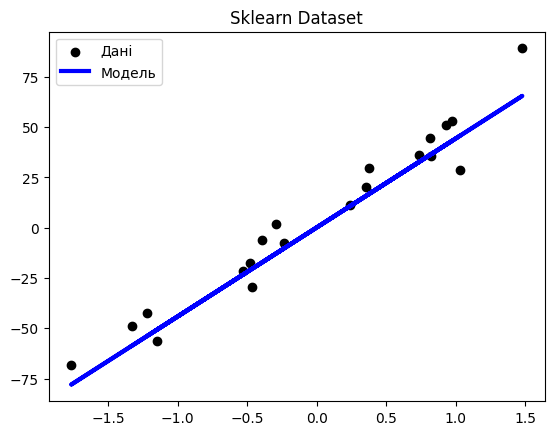

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

X_flat = X.flatten()

df_gen = pd.DataFrame({
    'Feature': X_flat,
    'Target': y
})

df_gen.to_csv('generated_dataset_sklearn.csv', index=False)
print("Дані збережено у 'generated_dataset_sklearn.csv'")
print(df_gen.head())

X_train, X_test, y_train, y_test = train_test_split(df_gen[['Feature']], df_gen['Target'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.scatter(X_test, y_test, color='black', label='Дані')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Модель')
plt.title('Sklearn Dataset')
plt.legend()
plt.show()